In [ ]:
l

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

In [22]:
x = np.linspace(-100, 100, 1000)
x = x[x != 0]
y = np.array(list(map(lambda x: 2 ** x, x)))


In [ ]:
plt.scatter(x,y)

###  Скорость

In [2]:
arr = np.random.rand(1000000)
arr.shape

(1000000,)

In [3]:
l = range(1000000)

In [5]:
%timeit sum(l)
%timeit min(l)

127 ms ± 42.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
70.2 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%timeit sum(arr)
%timeit np.sum(arr)

%timeit min(arr)
%timeit np.min(arr)

%timeit max(arr)
%timeit np.max(arr)

365 ms ± 161 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.61 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
136 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.52 ms ± 573 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
150 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.99 ms ± 826 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Поиск экстремумов

In [4]:
def f(x):
    return -1 * np.sin(x)/x

In [5]:
def f_(x):
    return -f(x)

### Поиск локальных минимумов

Optimization terminated successfully.
         Current function value: -0.128375
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 19
         Function evaluations: 38


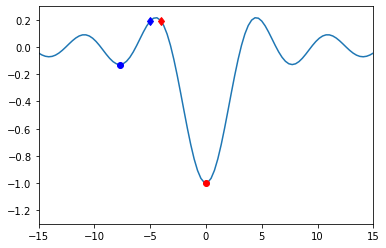

In [6]:
# objective function

x0 = -5 # start from x = -5
xmin0 = fmin(f,x0)

x1 = -4 # start from x = -4
xmin1 = fmin(f,x1)

# plot the function
x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
# plot of x0 and the minimum found startin from x0
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
# plot of x1 and the minimum found startin from x1
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

pylab.axis([-15,15,-1.3,0.3])
pylab.show()

### Поиск локальных максимумов

Optimization terminated successfully.
         Current function value: -0.217234
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -0.217234
         Iterations: 13
         Function evaluations: 26


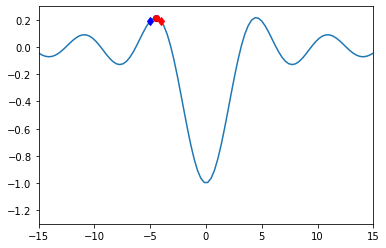

In [7]:
# objective function

x0 = -5 # start from x = -5
xmin0 = fmin(f_,x0)

x1 = -4 # start from x = -4
xmin1 = fmin(f_, x1)

# plot the function
x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
# plot of x0 and the minimum found startin from x0
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
# plot of x1 and the minimum found startin from x1
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

pylab.axis([-15,15,-1.3,0.3])
pylab.show()

### Ещё один способ поиска

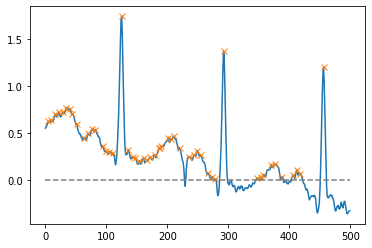

In [8]:
x = electrocardiogram()[3000:3500]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

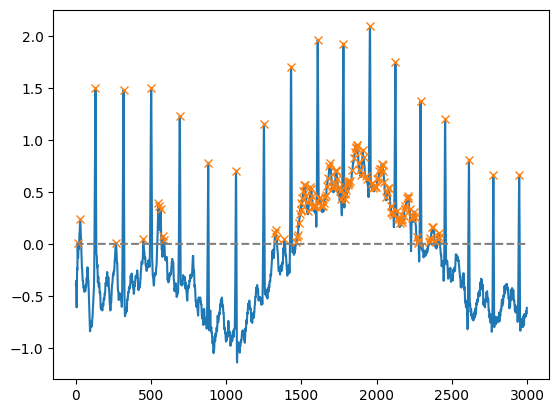

In [7]:
x = electrocardiogram()[1000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [10]:
np.max(peaks)

2948

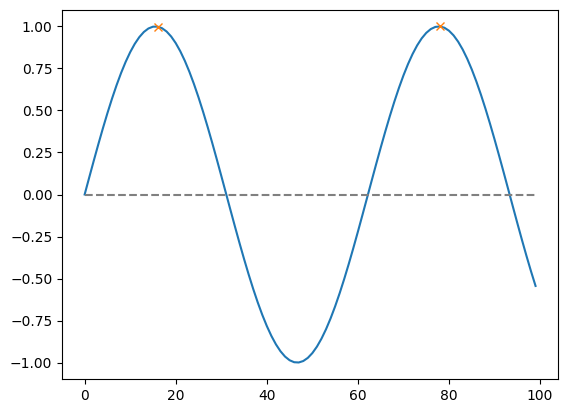

In [6]:
x = np.array([np.sin(xx) for xx in np.linspace(0, 10, 100)])
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

### Производная

In [26]:
def f(x):
    return x**2 + x**5

import scipy.misc
scipy.misc.derivative(f, 9, 1e-6)

32822.99997226801

In [ ]:
x = np.linspace(1, 100, 100)
fx = f(x)
fx

In [11]:
from scipy.misc import derivative
def f(x):
    return x**3 + x**2
derivative(f, 1.0, dx=1e-6)

4.999999999921734

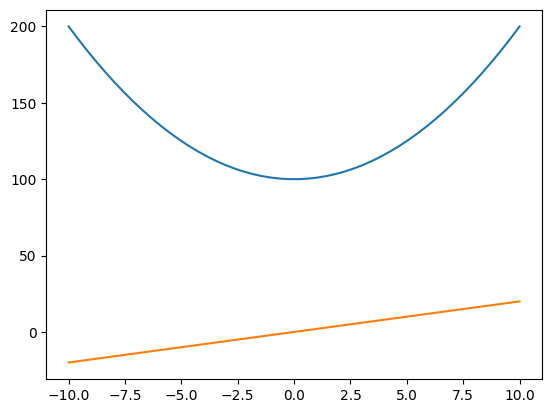

In [25]:
def f(x):
    return x ** 2 + 100
x = np.linspace(-10, 10)
f1 = [scipy.misc.derivative(f, xx, 1e6) for xx in x]
pylab.plot(x, f(x))
pylab.plot(x, f1)

In [13]:
x = np.linspace(-10, 10)
fx = f(x)
f1x = [derivative(f, xx, dx=1e-6, n=1) for xx in x]

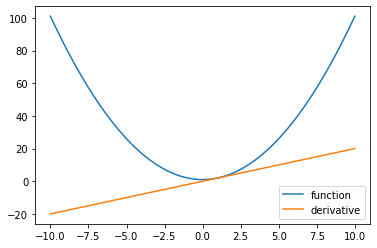

In [14]:
plt.plot(x, fx, label='function')
plt.plot(x, f1x, label='derivative')
plt.legend()
plt.show()

### numpy.gradient

In [15]:
x = np.array([1, 2, 4, 7, 11, 16], dtype=np.float)

In [16]:
j = np.gradient(x)
print(j)

[1.  1.5 2.5 3.5 4.5 5. ]


j[0] = (x[1]-x[0])/1 = (2-1)/1  = 1

j[1] = (x[2]-x[0])/2 = (4-1)/2  = 1.5

j[2] = (x[3]-x[1])/2 = (7-2)/2  = 2.5

j[3] = (x[4]-x[2])/2 = (11-4)/2 = 3.5

j[4] = (x[5]-x[3])/2 = (16-7)/2 = 4.5

j[5] = (x[5]-x[4])/1 = (16-11)/1 = 5

### Частные производные

In [28]:
def func(x, c0, c1):
    "Coordinate vector `x` should be an array of size two."
    return c0 * x[0]**2 + c1 * x[1]**2

In [29]:
x = np.ones(2)
c0, c1 = (1, 2)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0, c1)

array([2.        , 4.00000003])

### Вычисление частных производных

Хотим посчитать частные производные функции $f(x,y)=x^3y-x^2y^2+x-1$ в точке (1, 1)

$f'_x=3x^2y-2xy^2+1$

$f'_y=x^3-2x^2y$

$f'_x(1,1)=3-2+1=2$

$f'_y(1,1)=1-2=-1$

$grad_f(1,1) = (2, -1)$

### Минимизация функций

In [19]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [20]:
x0 = np.array([1.3, 5])

In [21]:
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 106
         Function evaluations: 199


In [22]:
def f1(x):
    return (x[0]**2) + (x[1]**2) 

In [23]:
res = minimize(f1, [2,5], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 64
         Function evaluations: 121


In [24]:
def f2(x):
    return 2**(x[0]**2) + (x[1]**2) - 5

In [25]:
res = minimize(f2, [2,5], method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: -4.000000
         Iterations: 59
         Function evaluations: 115
